**Atualizando a biblioteca para plotagem de gráficos**


In [96]:
%pip -q install plotly --upgrade
%pip install pandas
%pip install seaborn
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Importando bibliotecas**

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [98]:
base = pd.read_csv('iris.csv', sep=',')

In [99]:
base

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Verificando ausência na base de dados**

In [100]:
# índices das linhas que contém valores NaN
missing_indices = base[base.isnull().any(axis=1)].index

# imprime apenas as linhas com valoes ausentes
display(base.iloc[missing_indices])

,sepallength,sepalwidth,petallength,petalwidth,class


**Imputando pela média dos valores da mesma classe**

In [101]:
def trataFaltantes(df_dataset, colunas_faltantes, coluna_classe):
    '''
    Substitui os valores faltantes pela média dos outros valores do mesmo atributo
    de amostras que sejam da mesma classe.

    Parâmetros:
    - df_dataset: DataFrame com os dados
    - colunas_faltantes: Lista das colunas que contêm valores faltantes a serem tratados
    - coluna_classe: Coluna que contém as classes
    '''

    # Iterar sobre cada coluna com valores faltantes
    for coluna in colunas_faltantes:
        # Para cada classe na coluna de classe
        for classe in df_dataset[coluna_classe].unique():
            # Seleciona os dados não nulos da mesma classe
            not_null = df_dataset[~pd.isnull(df_dataset[coluna]) & (df_dataset[coluna_classe] == classe)]

            # Calcula a média dos valores da coluna para essa classe
            media_classe = not_null[coluna].mean()

            # Substitui os valores nulos pela média da classe
            df_dataset.loc[pd.isnull(df_dataset[coluna]) & (df_dataset[coluna_classe] == classe), coluna] = media_classe

    return df_dataset

# Colunas que possuem valores faltantes
colunas_com_faltantes = ['sepallength', 'sepalwidth']
nome_ultima_coluna  =base.columns[-1]

# Aplicando a função ao DataFrame base
base = trataFaltantes(base, colunas_com_faltantes,nome_ultima_coluna)

# Imprime apenas as linhas que antes possuíam valores NaN
print('\nAmostras que possuíam valores faltantes:')
display(base.iloc[missing_indices])


Amostras que possuíam valores faltantes:


,sepallength,sepalwidth,petallength,petalwidth,class


**Verificar se existem amostras inconsistentes e redundantes**

In [102]:
Nome_das_Colunas = base.columns[:-1]

In [103]:
df_duplicates = base[base.duplicated(subset=Nome_das_Colunas,keep=False)]
# se houver valores redundantes ou inconsistentes, imprima
if len(df_duplicates)>0:
    print('\nAmostras redundantes ou inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem valores duplicados')


Amostras redundantes ou inconsistentes:


,sepallength,sepalwidth,petallength,petalwidth,class
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


Como podemos ver, existem algumas amostras redundantes (duplicadas) e outras inconsistentes (amostras iguais, mas com classes distintas).
Primeiro, serão removidas as amostras redundantes, mantendo na base apenas uma delas.

In [104]:
def delDuplicatas( df_dataset ):
    '''
    Para cada grupo de amostras duplicadas, mantém uma e apaga as demais
    '''

    # remove as amostras duplicadas, mantendo apenas a primeira ocorrencia
    df_dataset = df_dataset.drop_duplicates(keep = 'first')

    return df_dataset

base = delDuplicatas( base )

**Após remover as amostras redundantes, é preciso checar se há amostras inconsistentes.**

In [105]:
# para detectar inconsistências, a rotina abaixo obtém as amostras onde os valores
# dos atributos continuam duplicados. Neste caso, os atributos serão iguais, mas as classes serão distintas
df_duplicates = base[base.duplicated(subset=Nome_das_Colunas,keep=False)]

# se tiver valores inconsistentes, imprime
if len(df_duplicates)>0:
    print('\nAmostras inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem mostras inconsistentes')


Não existem mostras inconsistentes


**Tendo amostras inconsistentes, será necessário apagar estas instâncias, já que não sabemos qual delas está correta**

In [106]:
def delInconsistencias(df_dataset):
    '''
    Remove todas as amostras inconsistentes da base de dados
    '''

    df_dataset = df_dataset.drop_duplicates(subset=Nome_das_Colunas,keep=False)

    return df_dataset

base = delInconsistencias(base)

# obtém apenas as amostras onde os valores dos atributos estão duplicados
df_duplicates = base[base.duplicated(subset=Nome_das_Colunas,keep=False)]

# se tiver valores redundantes ou inconsistentes, imprime
if len(df_duplicates)>0:
    display(df_duplicates)
else:
    print('Não existem amostras redundantes ou inconsistentes')


Não existem amostras redundantes ou inconsistentes


**Agora, vamos gerar algumas estatísticas sobre a base de dados.**
A função describe() da Pandas sumariza as principais estatísticas sobre os dados de um data frame, como a média, o desvio padrão, valor máximo, valor mínimo e alguns percentis.

In [107]:
CompiladoBase= base.describe()
display(CompiladoBase)

,sepallength,sepalwidth,petallength,petalwidth
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Vamos normalizar os dados?**
Para isso, vamos utilizar a função MinMaxScaler da biblioteca scikit-learn. A normalização Min-Max transforma os dados para que eles fiquem dentro de um intervalo específico, geralmente entre 0 e 1.

In [108]:
from sklearn.preprocessing import MinMaxScaler
# Inicializa o MinMaxScaler
scaler = MinMaxScaler()

colunas_para_normalizar = base.iloc[:, :-1]

# Ajusta e transforma os dados com o MinMaxScaler
base_normalizada = pd.DataFrame(scaler.fit_transform(colunas_para_normalizar), columns=colunas_para_normalizar.columns)

# Adiciona a última coluna não normalizada ao DataFrame normalizado
base_normalizada[base.columns[-1]] = base[base.columns[-1]]

# Exibe o DataFrame normalizado com a última coluna inalterada
print(base_normalizada)

base_normalizada.describe()

     sepallength  sepalwidth  petallength  petalwidth           class
0       0.222222    0.625000     0.067797    0.041667     Iris-setosa
1       0.166667    0.416667     0.067797    0.041667     Iris-setosa
2       0.111111    0.500000     0.050847    0.041667     Iris-setosa
3       0.083333    0.458333     0.084746    0.041667     Iris-setosa
4       0.194444    0.666667     0.067797    0.041667     Iris-setosa
..           ...         ...          ...         ...             ...
142     0.666667    0.416667     0.711864    0.916667             NaN
143     0.555556    0.208333     0.677966    0.750000  Iris-virginica
144     0.611111    0.416667     0.711864    0.791667  Iris-virginica
145     0.527778    0.583333     0.745763    0.916667  Iris-virginica
146     0.444444    0.416667     0.694915    0.708333  Iris-virginica

[147 rows x 5 columns]


,sepallength,sepalwidth,petallength,petalwidth
count,147.000000,147.000000,147.000000,147.000000
mean,0.432351,0.439909,0.471233,0.462018
std,0.230306,0.182087,0.298154,0.315781
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.576271,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


**Outro passo importante na análise e tratamento dos dados é a detecção de outliers**

Uma das maneiras mais simples de verificar se os dados contém outliers é criar um gráfico box plot de cada atributo. Para isso, podemos usar a função boxplot da biblioteca Pandas.

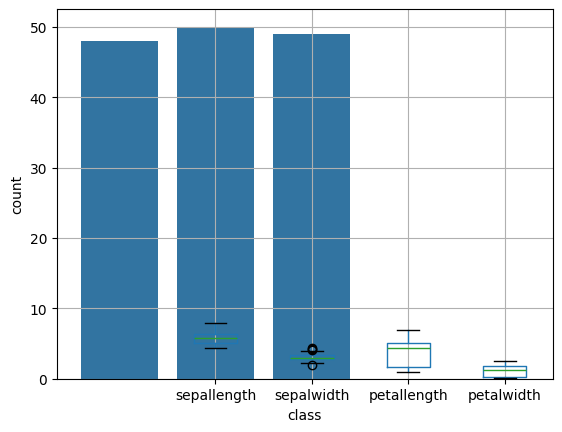

In [109]:
# gera um bloxplot para cada atributo
base.boxplot(figsize=(15,7))
plt.show()

Outra forma de analisar se a base de dados contém outliers é usar gráficos de dispersão. Isto pode ser feito a partir dos dataframes usando a biblioteca Seaborn. Juntamente com essa biblioteca, também é recomendável importar a biblioteca Matplotlib para personalizar os gráficos.

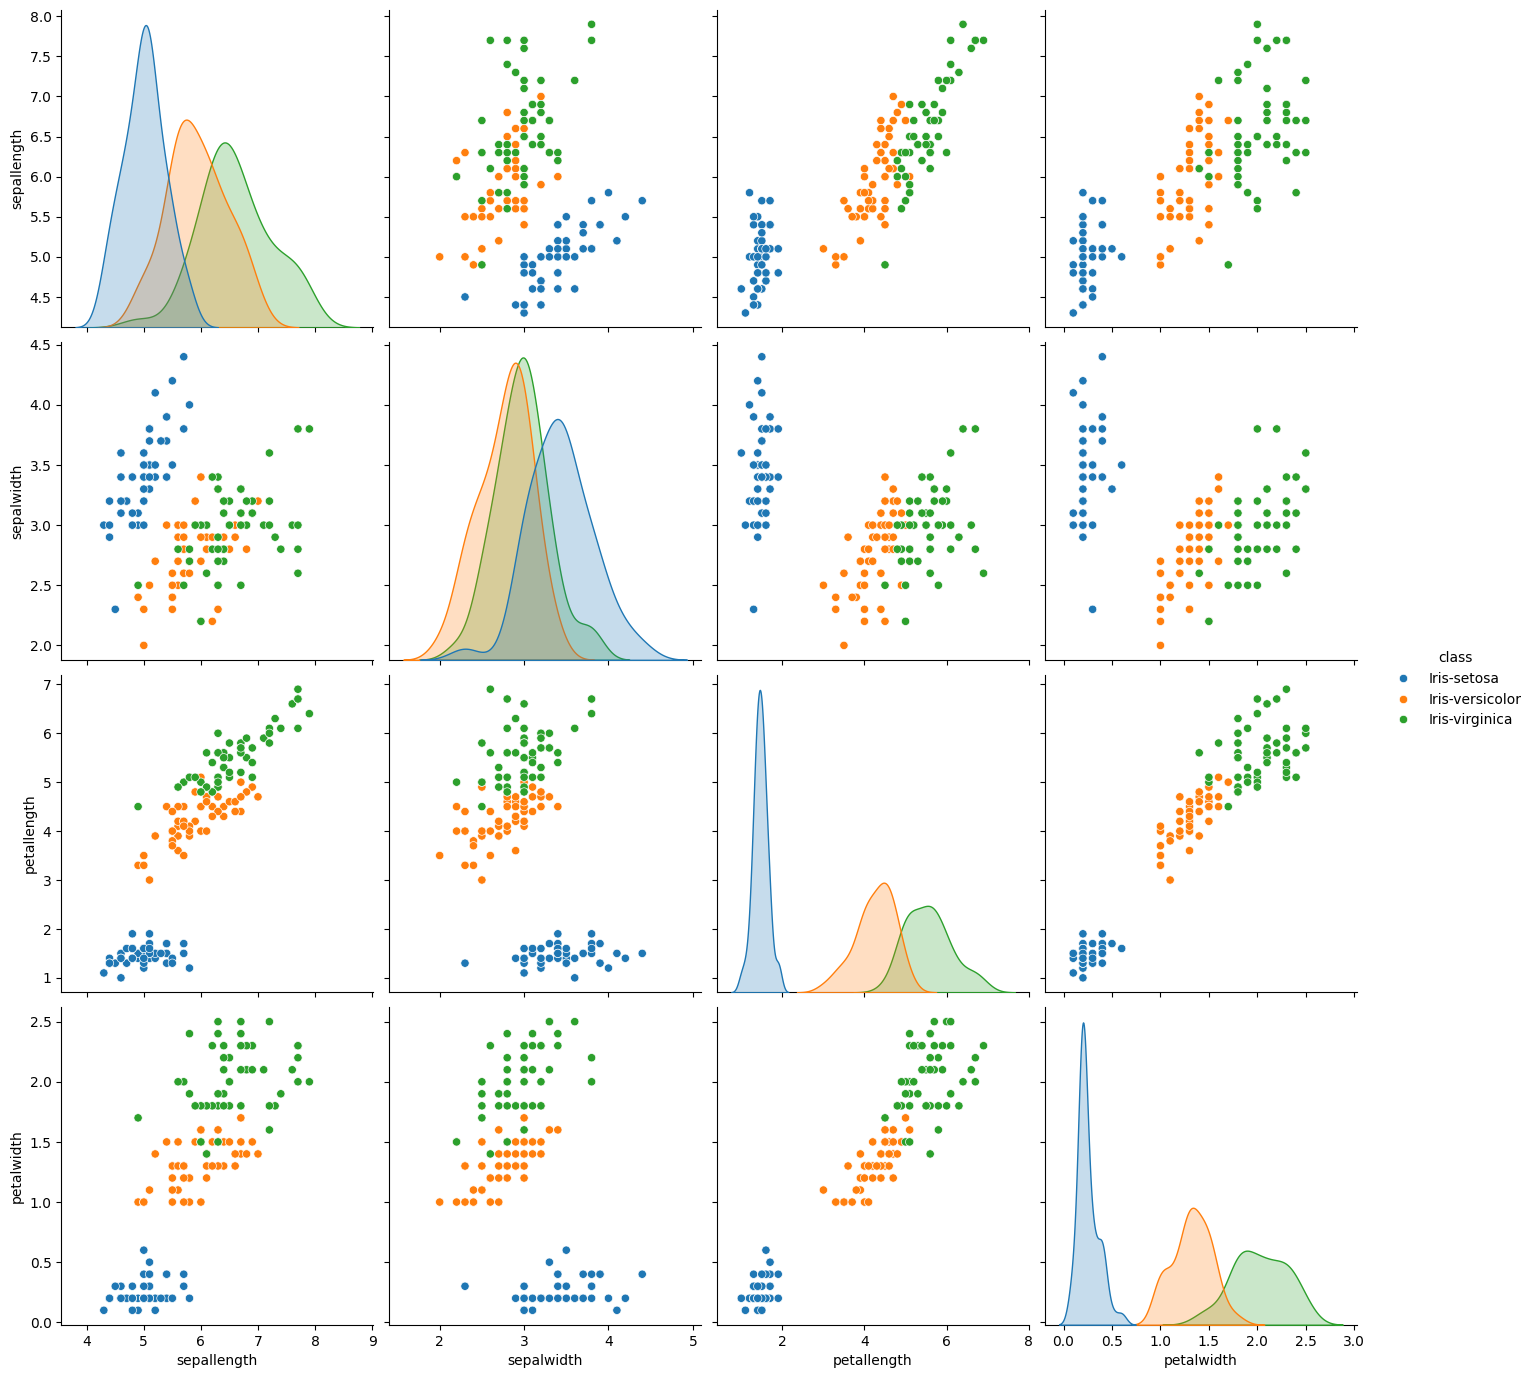

In [110]:
# matriz de gráficos scatter
sns.pairplot(base, hue='class', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

**Agora investigue como eliminar outlier a partir destes gráficos!**

**Contando quantidade de instâncias**


In [111]:
Classificação = base.columns[-1]
np.unique(base[Classificação], return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([48, 50, 49]))

In [112]:
sns.countplot(x = base[Classificação]);

**Separando os atributos de entrada e de classe**

In [113]:
X_prev = base.iloc[:, 0:4]

In [114]:
X_prev

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [115]:
y_classe = base.iloc[:, 4]

In [116]:
y_classe

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 147, dtype: object

**Método de amostragem Holdout**

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_prev

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [119]:
y_classe

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 147, dtype: object

In [120]:
y_classe.shape

(147,)

In [121]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [122]:
X_treino.shape

(117, 4)

In [123]:
X_teste.shape

(30, 4)

In [124]:
y_treino

137     Iris-virginica
47         Iris-setosa
121     Iris-virginica
27         Iris-setosa
4          Iris-setosa
            ...       
73     Iris-versicolor
108     Iris-virginica
14         Iris-setosa
94     Iris-versicolor
104     Iris-virginica
Name: class, Length: 117, dtype: object

In [125]:
y_teste

127     Iris-virginica
53     Iris-versicolor
140     Iris-virginica
19         Iris-setosa
106     Iris-virginica
12         Iris-setosa
78     Iris-versicolor
31         Iris-setosa
83     Iris-versicolor
9          Iris-setosa
26         Iris-setosa
98     Iris-versicolor
146     Iris-virginica
69     Iris-versicolor
136     Iris-virginica
68     Iris-versicolor
18         Iris-setosa
71     Iris-versicolor
126     Iris-virginica
30         Iris-setosa
29         Iris-setosa
107     Iris-virginica
38         Iris-setosa
120     Iris-virginica
57     Iris-versicolor
22         Iris-setosa
66     Iris-versicolor
135     Iris-virginica
84     Iris-versicolor
11         Iris-setosa
Name: class, dtype: object

In [126]:
import pickle

In [127]:
with open('iris.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)